In [1]:
import warnings
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
warnings.filterwarnings('ignore')

In [2]:
import os
def load_test_data():
    directory = os.path.dirname(os.path.realpath('COMP237_GroupProject'))
    directory = os.path.join(directory,"TestData")
    files = [f for f in os.listdir(directory)]

    # Create dataframe
    # Columns: COMMENT_ID, AUTHOR, DATE, CONTENT, TAG
    result = pd.concat(
        (pd.read_csv(os.path.join(directory, f)) for f in files))

    # Content and class matter, keep two columns only
    result = result[['CONTENT', 'CLASS']]
    return result


def load_train_data():
    directory = os.path.dirname(os.path.realpath('COMP237_GroupProject'))
    directory = os.path.join(directory, "TrainData")
    files = [f for f in os.listdir(directory)]

    # Create dataframe
    # Columns: COMMENT_ID, AUTHOR, DATE, CONTENT, TAG
    result = pd.concat(
        (pd.read_csv(os.path.join(directory, f)) for f in files))

    # Content and class matter, keep two columns only
    result = result[['CONTENT', 'CLASS']]
    return result


data = load_train_data()


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  350 non-null    object
 1   CLASS    350 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [4]:
data

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...
345,This song means so much to me thank you soooo...,0
346,&lt;3﻿,0
347,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,Honestly speaking except taylor swift and adel...,0


In [5]:
from nltk import WordNetLemmatizer, PorterStemmer, SnowballStemmer, LancasterStemmer
def Lemmatizer(data):
    tmp = data.copy()
    tmp['CONTENT'] = tmp.apply(
        lambda x: ''.join([WordNetLemmatizer().lemmatize(word=x)for x in x['CONTENT']]), axis=1)
    return tmp


def PorterStemmer(data):
    tmp = data.copy()
    tmp['CONTENT'] = tmp.apply(
        lambda x: ''.join([PorterStemmer().stem(word=x)for x in x['CONTENT']]), axis=1)
    return tmp


def SnowballStemmer(data):
    tmp = data.copy()
    tmp['CONTENT'] = tmp.apply(
        lambda x:  ''.join([SnowballStemmer(language='english').stem(x)for x in x['CONTENT']]), axis=1)
    return tmp


def LancasterStemmer(data):
    tmp = data.copy()
    tmp['CONTENT'] = tmp.apply(
        lambda x: ''.join([LancasterStemmer().stem(word=x)for x in x['CONTENT']]), axis=1)
    return tmp


Train data

In [6]:
from sklearn.model_selection import train_test_split
count_vectorizer = CountVectorizer(stop_words='english', min_df=1)

data_vectorized = count_vectorizer.fit_transform(data['CONTENT'].to_numpy())

x_train, x_test, y_train, y_test = train_test_split(
    data_vectorized, data['CLASS'].to_numpy(), test_size=0.25, random_state=420)


In [7]:
pd.DataFrame(data_vectorized.toarray(),
             columns=count_vectorizer.get_feature_names_out())


,00,000,002,018,04,053012,0cb8qfjaa,0d878a889c,0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks,0laviqu2b,...,young,younique,youniqueproducts,yourelink,youtu,youtube,youtuber,yvovhafsv5qzzqo,zimbabwe,οh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
tfidf = TfidfTransformer()
train_tfidf = tfidf.fit_transform(x_train)
classifier = MultinomialNB().fit(train_tfidf, y_train)


# Mean accuacy

In [13]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, x_train, y_train, cv=10)
score.mean()

0.8935897435897436

# Test data

In [9]:
test_tfidf = tfidf.fit_transform(x_test)
predictions = classifier.predict(test_tfidf)


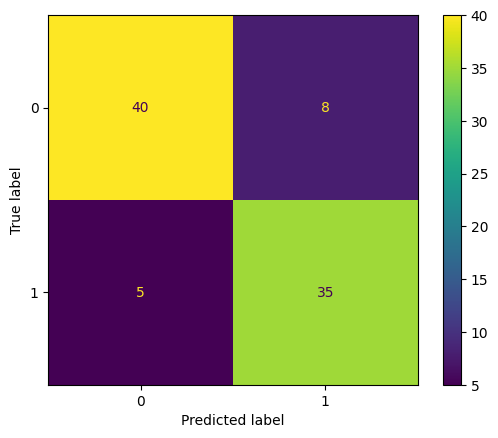

In [15]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cf = confusion_matrix(predictions, y_test)
disp = ConfusionMatrixDisplay(cf)
disp.plot()
plt.show()